In [1]:
import pandas as pd
import numpy as np 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train=pd.read_csv('D:/DataScience_Udemy/Py_DS_ML_Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***Cheking missing Value***

In [9]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

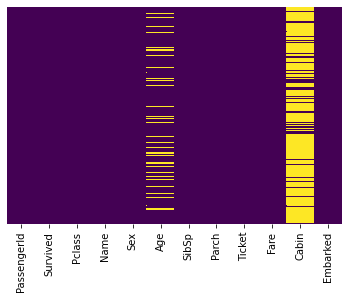

In [16]:
sns.heatmap(train.isnull(),cmap='viridis',yticklabels=False,cbar=False)

***in above heatmap plot yellow color is denoting as NaN value so ,in "Age" column we have roughly 20% of data is NaN and in "Cabin" column more NaN is present***

In [24]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

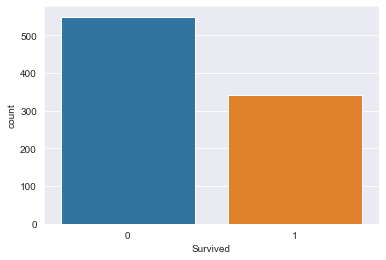

In [25]:
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

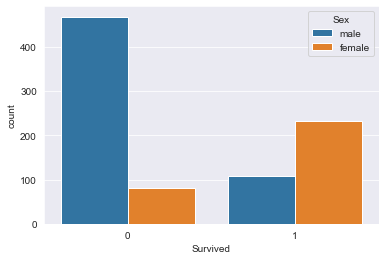

In [26]:
sns.countplot(x='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

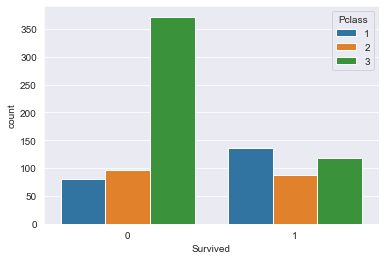

In [27]:
sns.countplot(data=train,x='Survived',hue='Pclass')

<AxesSubplot:xlabel='Age'>

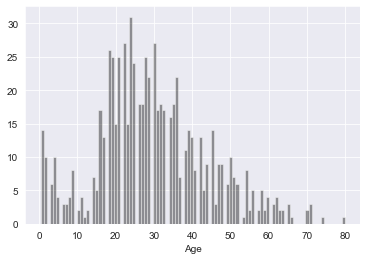

In [39]:
sns.distplot(train['Age'].dropna(),kde=False,bins=100,color='black')

<AxesSubplot:ylabel='Frequency'>

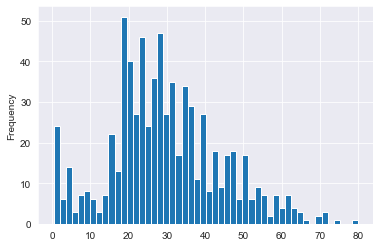

In [43]:
train['Age'].plot.hist(bins=50)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

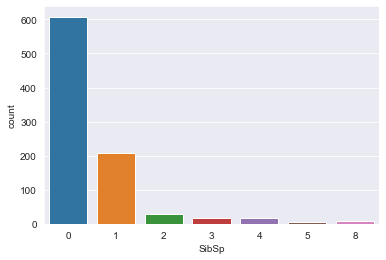

In [45]:
sns.countplot(data=train,x='SibSp')

In [46]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<AxesSubplot:>

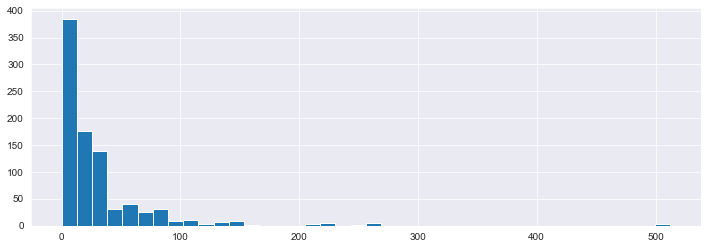

In [49]:
train['Fare'].hist(figsize=(12,4),bins=40)

In [4]:
import cufflinks as cf

In [5]:
cf.go_offline()

In [6]:
train['Fare'].iplot(kind='hist',bins=50)

In [56]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

#### Data Cleaning is starting from below 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

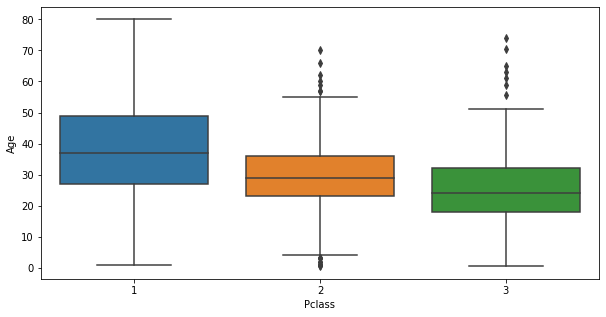

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(y='Age',x='Pclass',data=train)

***in above plot we see that Age of class "1" passengers is older than class "2" and class "3"***

***so we can't fill average Age on the place of "NaN" in Age column***

***so here one function is created to take average age of each class and those Average age will be fileled on the place of "NaN" in Age column***

In [5]:
def impute_Age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age)==True:
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
             

In [6]:
train['Age']=train[['Age','Pclass']].apply(impute_Age,axis=1)

<AxesSubplot:>

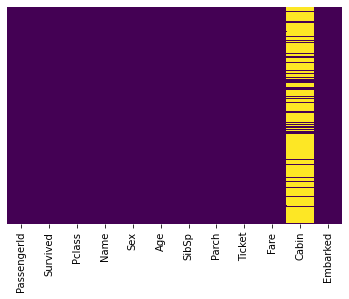

In [7]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis',yticklabels=False)

**In above plot we can see there is no "NaN" value in 'Age' column now** 

**in "Cabin " column there are too many values with 'NaN' so this column should be dropped** 

In [8]:
train.drop('Cabin',inplace=True,axis=1)

***Function ".drop" is used to drop the column from dataFrame***

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

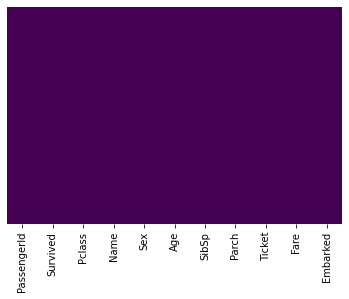

In [21]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis',yticklabels=False)

In [10]:
train['Embarked'].isnull().sum()

2

In [11]:
train['Embarked'].isnull().values.any()

True

#### ***1.df['column'].isnull().sum***
#### ***2. df['column'].isnull().values.any()***
***with two above functions we can check that if any 'NaN' Value is there in whole dataFrame or for in any particular column***

In [12]:
train.dropna(inplace=True)

***with code "pd.dropna" any column can be dropped from dataframe***

In [13]:
train['Embarked'].isnull().sum()

0

##### working on Categorical columns to convert it in numerical by the help of the function

"***.get_dummies***"

In [14]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


### Note
in above query we can see that there is a column for every single category 

and if female is '1' then male is definetly '0' and vice versa 
    
thus these columns are perfect predictor of one another causing issue named "multi collinear"

so if these both column will get used by our machine learning model 

then model will perfectly predict if '1' is female then '0' will definetly male 

thus mess up with model because a bunch of column is perfect predictor of another columns

That's why we will drop one column from these adding one more argument "drop_first"

***Check Below code:--->>>***

In [17]:
Sex=pd.get_dummies(train['Sex'],drop_first=True)

In [26]:
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [22]:
pd.get_dummies(train['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


***Same method will be used for 'Embarked'column***

In [21]:
Embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [23]:
Embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


***Now these two new columns will be concatenated in existing dataFrame 'train'***

In [24]:
train=pd.concat([train,Sex,Embark],axis=1)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [29]:
train.drop(['Name','Sex','Ticket','Embarked'],inplace=True,axis=1)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [31]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [ ]:
since passengerId is also like 'index' of dataFrame we do not need that also Let's drop it 

In [32]:
train.drop('PassengerId',inplace=True,axis=1)

In [33]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#### Note 
   "***Pclass***" is also an categorical column with three category '1','2','3' 

so for this 'Pclass' column ".get_dummies" method can be applied and train machine learning model separately

And we can explore difference in models with this 'Pclass' and without 'Pclass'


##### In udemy project there are separate test data in csv format but here 'train' dataset will be used as whole data and 'train_test_split' will be performed on this since this dataset is already cleaned and ready or ML model

In [38]:
x=train.drop('Survived',axis=1)
y=train['Survived']

In [40]:
import sklearn 

In [41]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [46]:
from sklearn.linear_model import LogisticRegression

In [49]:
logmodel=LogisticRegression()

In [51]:
logmodel.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [52]:
predictions=logmodel.predict(X_test)

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [55]:
from sklearn.metrics import confusion_matrix

In [58]:
(confusion_matrix(predictions,y_test))

array([[147,  30],
       [ 16,  74]], dtype=int64)